In [1]:
import os
import random

from PIL import Image
import torchvision.transforms as T
import cv2
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

/home/a.skripnikov/ai/task1/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
# Download latest version
path = kagglehub.dataset_download("alexattia/the-simpsons-characters-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.08G/1.08G [00:32<00:00, 35.5MB/s]

Extracting files...


Path to dataset files: /home/a.skripnikov/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4


In [6]:
dataset_path = "/home/a.skripnikov/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4/simpsons_dataset"

class_names = [d for d in os.listdir(dataset_path) 
              if os.path.isdir(os.path.join(dataset_path, d))]

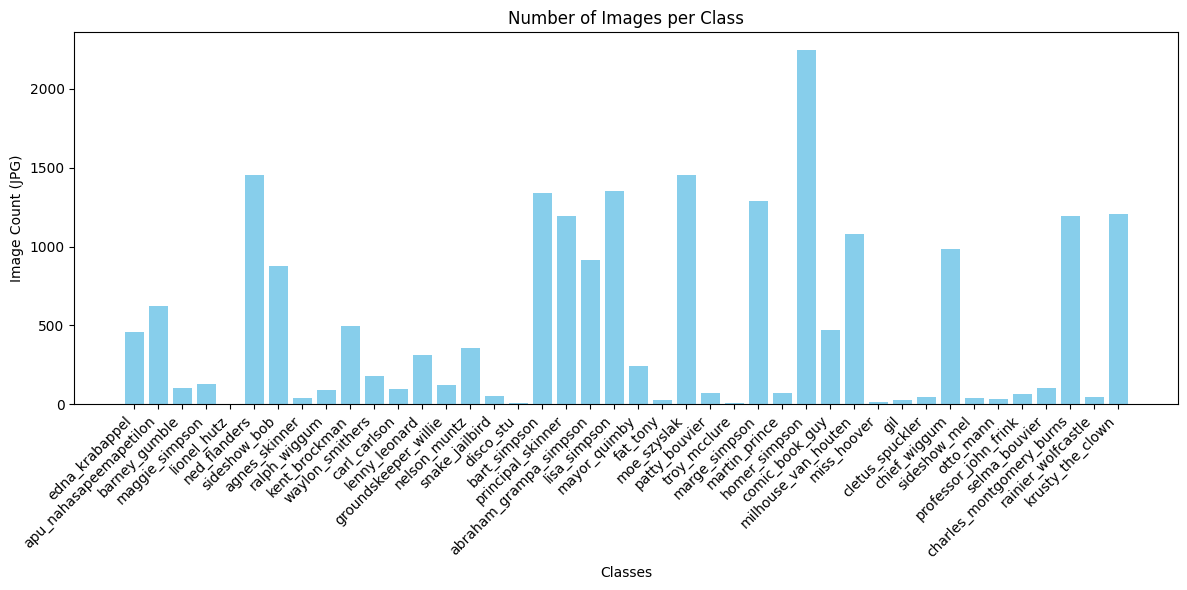

2246


In [ ]:

counts = []
class_counts = {}

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len([f for f in os.listdir(class_dir) 
                    if f.lower().endswith('.jpg')])
    counts.append(num_images)
    class_counts[class_name] = num_images

max_images = max(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title("Number of Images per Class")
plt.xlabel("Classes")
plt.ylabel("Image Count (JPG)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Number of Images per Class before augmentation")
plt.show()


print(max_images)

In [3]:

transform = T.Compose([
    T.RandomHorizontalFlip(p=0.5),         
    T.RandomRotation(degrees=15),           
    T.RandomResizedCrop(size=224, scale=(0.9, 1.0)),  
    T.ToTensor()                            
])

In [38]:

for class_name, count in class_counts.items():
    if count >= max_images:
        continue
    
    class_dir = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
    
    original_images = []
    for img_file in image_files:
        try:
            img = Image.open(os.path.join(class_dir, img_file)).convert('RGB')
            original_images.append(img)
        except:
            continue
    
    needed = max_images - count
    
    for i in range(needed):
        img = random.choice(original_images)
        augmented = transform(img)
        augmented = T.ToPILImage()(augmented)  
        
        new_name = f"aug_{i}_.jpg"
        augmented.save(os.path.join(class_dir, new_name))

print(f"Балансировка завершена! Все классы содержат ~{max_images} изображений")

Балансировка завершена! Все классы содержат ~2246 изображений


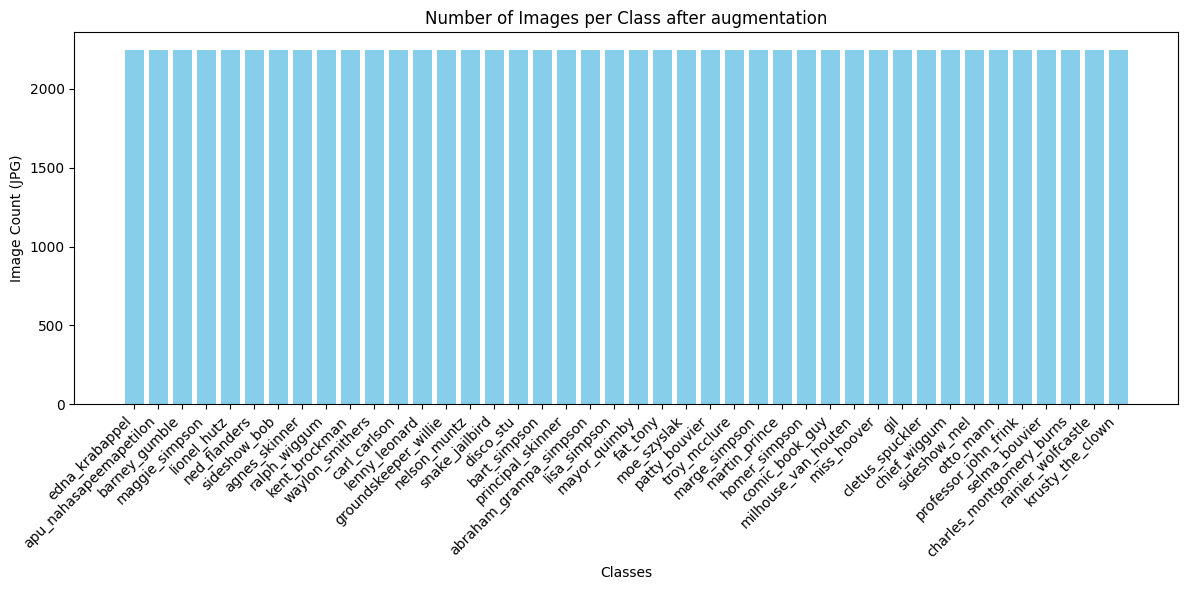

In [7]:
counts = []

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len([f for f in os.listdir(class_dir) 
                    if f.lower().endswith('.jpg')])
    counts.append(num_images)

plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title("Number of Images per Class after augmentation")
plt.xlabel("Classes")
plt.ylabel("Image Count (JPG)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Number of Images per Class after augmentation")
plt.show()

In [2]:


def plot_classification_metrics():
    class_report = pd.read_csv('class_report.csv')

    class_report = class_report[class_report['class'] != 'accuracy']
    class_report = class_report[class_report['class'] != 'macro avg']
    class_report = class_report[class_report['class'] != 'weighted avg']

   
    fig, ax = plt.subplots(figsize=(10, 6))

    classes = class_report['class'].values

    # Метрики для визуализации
    precision = class_report['precision'].values
    recall = class_report['recall'].values
    f1_score = class_report['f1-score'].values

    width = 0.2

    x = np.arange(len(classes))

    ax.bar(x - width, precision, width, label='Precision', color='b')
    ax.bar(x, recall, width, label='Recall', color='g')
    ax.bar(x + width, f1_score, width, label='F1-Score', color='r')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Precision, Recall, and F1-Score by Class')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.savefig('classification_metrics.png')

    plt.show()


plot_classification_metrics()


KeyError: 'class'

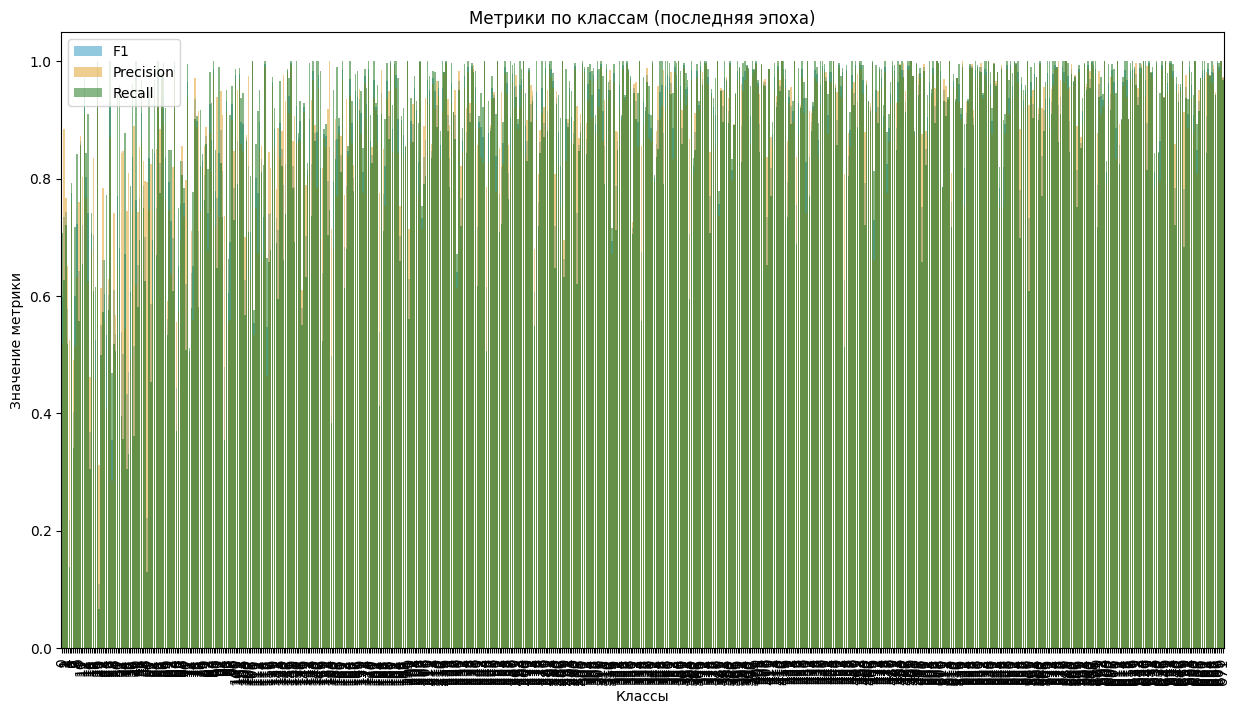


Проблемные классы (F1 < 0.5):


,Unnamed: 0,precision,recall,f1-score,support
4,4,0.525424,0.137778,0.218310,450.0
6,6,0.490385,0.340757,0.402102,449.0
15,15,0.462838,0.305122,0.367785,449.0
20,20,0.312500,0.066815,0.110092,449.0
27,27,0.285135,0.468889,0.354622,450.0
35,35,0.744565,0.305122,0.432859,449.0
36,36,0.809783,0.331111,0.470032,450.0
49,4,0.794521,0.128889,0.221797,450.0
65,20,0.555184,0.369710,0.443850,449.0
94,4,0.737327,0.355556,0.479760,450.0


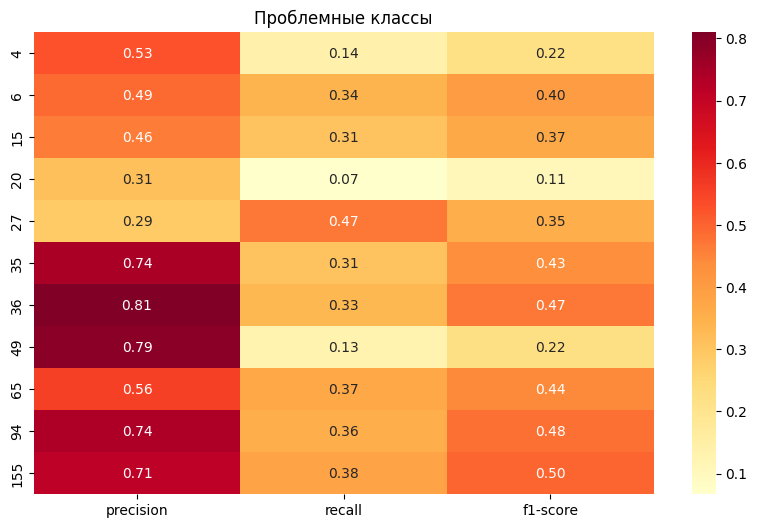


Глобальные метрики:


,Unnamed: 0,precision,recall,f1-score,support
42,accuracy,0.642391,0.642391,0.642391,0.642391
43,macro avg,0.669007,0.642428,0.626363,18867.000000
44,weighted avg,0.669008,0.642391,0.626334,18867.000000
87,accuracy,0.781841,0.781841,0.781841,0.781841
88,macro avg,0.790695,0.781865,0.772170,18867.000000
89,weighted avg,0.790681,0.781841,0.772144,18867.000000
132,accuracy,0.819314,0.819314,0.819314,0.819314
133,macro avg,0.836291,0.819345,0.818704,18867.000000
134,weighted avg,0.836296,0.819314,0.818688,18867.000000
177,accuracy,0.858165,0.858165,0.858165,0.858165


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Ваши данные (замените на чтение из файла)
with open('class_report.csv') as f:
    data = f.read()

# Функция для обработки данных
def process_metrics_data(data):
    # Читаем данные
    df = pd.read_csv(StringIO(data), skipinitialspace=True)
    
    # Удаляем строки с общими метриками
    class_metrics = df[~df.iloc[:,0].isin(['accuracy', 'macro avg', 'weighted avg'])]
    global_metrics = df[df.iloc[:,0].isin(['accuracy', 'macro avg', 'weighted avg'])]
    
    return class_metrics, global_metrics

# Функция для визуализации
def visualize_class_metrics(class_metrics):
    plt.figure(figsize=(15, 8))
    
    # Сортируем классы по F1-score
    class_metrics = class_metrics.sort_values('f1-score', ascending=False)
    
    # Создаем bar plot
    sns.barplot(x=class_metrics.index, y='f1-score', data=class_metrics, color='skyblue', label='F1')
    sns.barplot(x=class_metrics.index, y='precision', data=class_metrics, color='orange', alpha=0.5, label='Precision')
    sns.barplot(x=class_metrics.index, y='recall', data=class_metrics, color='green', alpha=0.5, label='Recall')
    
    plt.title('Метрики по классам (последняя эпоха)')
    plt.xlabel('Классы')
    plt.ylabel('Значение метрики')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Функция для отображения проблемных классов
def show_problem_classes(class_metrics, threshold=0.5):
    problem_classes = class_metrics[class_metrics['f1-score'] < threshold]
    
    if not problem_classes.empty:
        print("\nПроблемные классы (F1 < 0.5):")
        display(problem_classes)
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(problem_classes[['precision', 'recall', 'f1-score']], 
                    annot=True, fmt=".2f", cmap="YlOrRd")
        plt.title('Проблемные классы')
        plt.show()
    else:
        print("\nНет проблемных классов (F1 >= 0.5 для всех классов)")

# Основной код
class_metrics, global_metrics = process_metrics_data(data)

# Визуализация
visualize_class_metrics(class_metrics)
show_problem_classes(class_metrics)

# Показать глобальные метрики
print("\nГлобальные метрики:")
display(global_metrics)